# Generating Gowdy cosmological models by Sanchez et al Metric 8
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 15, 2022

Here we work with metric 8

https://arxiv.org/abs/gr-qc/0312083

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [5]:
tau,chi,sigma,delta,dtau,dchi,dsigma,ddelta = symbols( 'tau chi sigma delta dtau dchi dsigma ddelta' ) 

In [6]:
P = Function('P')(tau,chi)
P

In [7]:
Q = Function('Q')(tau,chi)
Q

In [8]:
Lambda = Function('lambda')(tau,chi)
Lambda

In [11]:
variables = Matrix( [tau,chi,sigma,delta] )
variables

⎡τ⎤
⎢ ⎥
⎢χ⎥
⎢ ⎥
⎢σ⎥
⎢ ⎥
⎣δ⎦

In [12]:
differentials = Matrix( [dtau,dchi,dsigma,ddelta] )
differentials

⎡ dtau ⎤
⎢      ⎥
⎢ dchi ⎥
⎢      ⎥
⎢dsigma⎥
⎢      ⎥
⎣ddelta⎦

In [14]:
lineElement = expand( exp(-Lambda/2) * exp(tau/2) * (-exp(-2*tau) * dtau**2 + dchi**2) + exp(-tau) * ( exp(P)*(dsigma + Q*ddelta)**2+exp(-P)*ddelta**2) ) 
lineElement

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   -λ(τ, χ)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     τ  -λ(τ, χ)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -τ  P(τ, χ)                  

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡  -3⋅τ   -λ(τ, χ)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     τ  -λ(τ, χ)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -τ  P(τ, χ)                  

In [18]:
from einsteinpy.symbolic import *

In [20]:
syms = sympy.symbols("tau chi sigma delta")
tau,chi,sigma,delta = syms

In [21]:
metric = MetricTensor(m,syms)

In [22]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡ ⎛ -3⋅τ   -λ(τ, χ)                                   ⎞                                    
⎢⎢ ⎜ ─────  ─────────                  -3⋅τ   -λ(τ, χ) ⎟                                    
⎢⎢ ⎜   2        2     ∂                ─────  ─────────⎟  3⋅τ  λ(τ, χ)                      
⎢⎢ ⎜ℯ     ⋅ℯ         ⋅──(λ(τ, χ))        2        2    ⎟  ───  ───────                      
⎢⎢ ⎜                  ∂τ            3⋅ℯ     ⋅ℯ         ⎟   2      2                         
⎢⎢-⎜───────────────────────────── + ───────────────────⎟⋅ℯ   ⋅ℯ                             
⎢⎢ ⎝              2                          2         ⎠                                    
⎢⎢─────────────────────────────────────────────────────────────────────                     
⎢⎢                                  2                                                       
⎢⎢                                                                                          
⎢⎢                                                                    

In [23]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, χ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, χ))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, χ))⎟    ⎜──(P(τ, χ))⎟    ──(λ(τ, χ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂χ       
⎢- ───────────────────────── - ────────────── + ─────────── + ──────────── - ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, χ) ∂           ∂             ∂           ∂        

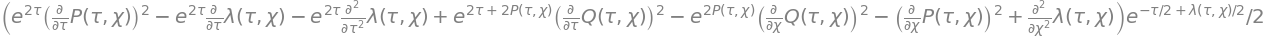

In [24]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [25]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                  2                             2                                    
⎢     ⎜ 2⋅τ ⎛∂          ⎞     2⋅τ ∂              2⋅τ  ∂              2⋅τ + 2⋅P(τ, χ) ⎛∂     
⎢0.25⋅⎜ℯ   ⋅⎜──(P(τ, χ))⎟  - ℯ   ⋅──(λ(τ, χ)) - ℯ   ⋅───(λ(τ, χ)) + ℯ               ⋅⎜──(Q(τ
⎢     ⎜     ⎝∂τ         ⎠         ∂τ                   2                             ⎝∂τ    
⎢     ⎝                                              ∂τ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [26]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, χ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, χ))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, χ))⎟    ⎜──(P(τ, χ))⎟    ──(λ(τ, χ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂χ       
⎢- ───────────────────────── - ────────────── + ─────────── + ──────────── - ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, χ) ∂           ∂             ∂           ∂        

In [27]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                      2                                2                   
⎢        -2⋅τ + 2⋅P(τ, χ) ⎛∂          ⎞          2⋅P(τ, χ) ⎛∂          ⎞         ⎛∂         
⎢- 0.25⋅ℯ                ⋅⎜──(Q(τ, χ))⎟  - 0.25⋅ℯ         ⋅⎜──(Q(τ, χ))⎟  - 0.25⋅⎜──(P(τ, χ)
⎢                         ⎝∂χ         ⎠                    ⎝∂τ         ⎠         ⎝∂τ        
⎢                                                                                           
⎢                                                                                           
⎢                                   2⋅P(τ, χ) ∂           ∂             ∂           ∂       
⎢                                  ℯ         ⋅──(Q(τ, χ))⋅──(Q(τ, χ))   ──(P(τ, χ))⋅──(P(τ, 
⎢                                             ∂χ          ∂τ            ∂χ          ∂τ      
⎢                                - ────────────────────────────────── 

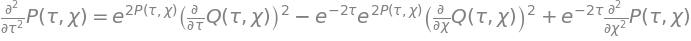

In [39]:
equation9 = Eq(diff(P,tau,tau),expand(solve( ricciSimplified[2,2].args[1], diff(P,tau,tau) )[0]))
equation9

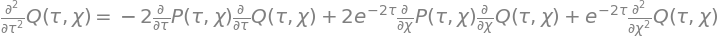

In [48]:
equation10 = Eq(diff(Q,tau,tau),expand(solve( ricciSimplified[3,2].args[1].subs(equation9.lhs,equation9.rhs), diff(Q,tau,tau) )[0]))
equation10

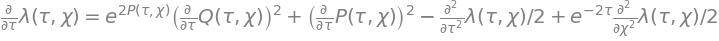

In [40]:
equation11 = Eq(diff(Lambda,tau),solve( ricciSimplified[0,0], diff(Lambda,tau) )[0] ) 
equation11

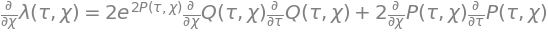

In [41]:
equation12 = Eq(diff(Lambda,chi),solve( ricciSimplified[0,1], diff(Lambda,chi) )[0] ) 
equation12 

In [50]:
vacuumFieldEquations = Matrix([equation9,equation10,equation11,equation12])
vacuumFieldEquations

⎡   2                                    2                                 2           2    
⎢  ∂              2⋅P(τ, χ) ⎛∂          ⎞     -2⋅τ  2⋅P(τ, χ) ⎛∂          ⎞     -2⋅τ  ∂     
⎢ ───(P(τ, χ)) = ℯ         ⋅⎜──(Q(τ, χ))⎟  - ℯ    ⋅ℯ         ⋅⎜──(Q(τ, χ))⎟  + ℯ    ⋅───(P(τ
⎢   2                       ⎝∂τ         ⎠                     ⎝∂χ         ⎠            2    
⎢ ∂τ                                                                                 ∂χ     
⎢                                                                                           
⎢  2                                                                                    2   
⎢ ∂                 ∂           ∂                -2⋅τ ∂           ∂              -2⋅τ  ∂    
⎢───(Q(τ, χ)) = - 2⋅──(P(τ, χ))⋅──(Q(τ, χ)) + 2⋅ℯ    ⋅──(P(τ, χ))⋅──(Q(τ, χ)) + ℯ    ⋅───(Q(
⎢  2                ∂τ          ∂τ                    ∂χ          ∂χ                    2   
⎢∂τ                                                                   